Dataset shape: (569, 30)
Number of features: 30
Number of samples: 569
Number of classes: 2
Class distribution: [212 357]

--- SVM Classifier ---
Accuracy: 0.9561
Precision: 0.9714
Recall: 0.9577
F1 Score: 0.9645

Classification Report:
              precision    recall  f1-score   support

   Malignant       0.93      0.95      0.94        43
      Benign       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



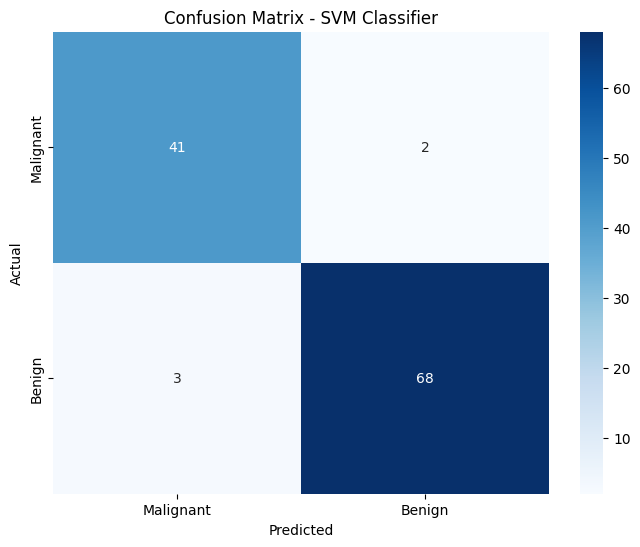


SVM with linear kernel:
Accuracy: 0.9561
Precision: 0.9714
Recall: 0.9577
F1 Score: 0.9645

SVM with poly kernel:
Accuracy: 0.8684
Precision: 0.8256
Recall: 1.0000
F1 Score: 0.9045

SVM with rbf kernel:
Accuracy: 0.9825
Precision: 0.9726
Recall: 1.0000
F1 Score: 0.9861

SVM with sigmoid kernel:
Accuracy: 0.9561
Precision: 0.9459
Recall: 0.9859
F1 Score: 0.9655


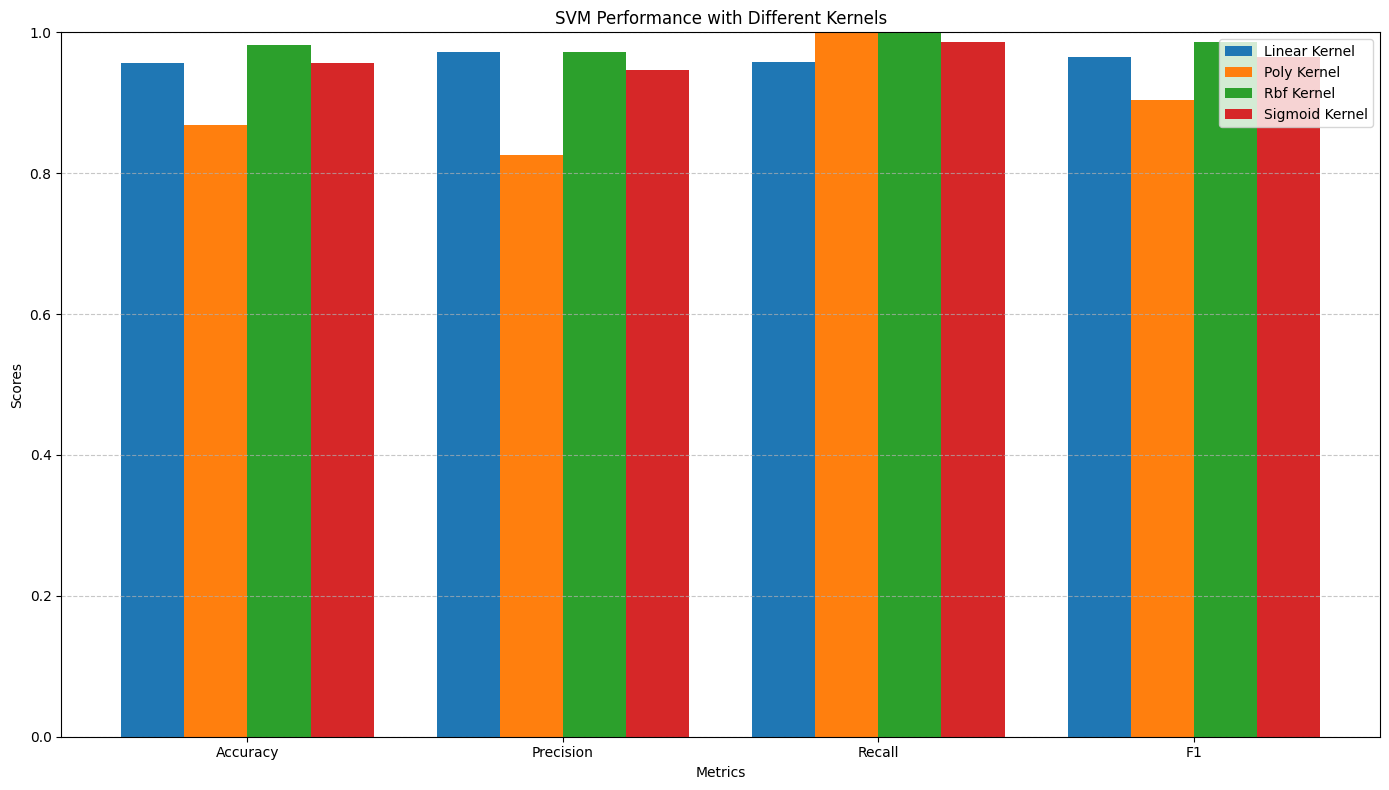

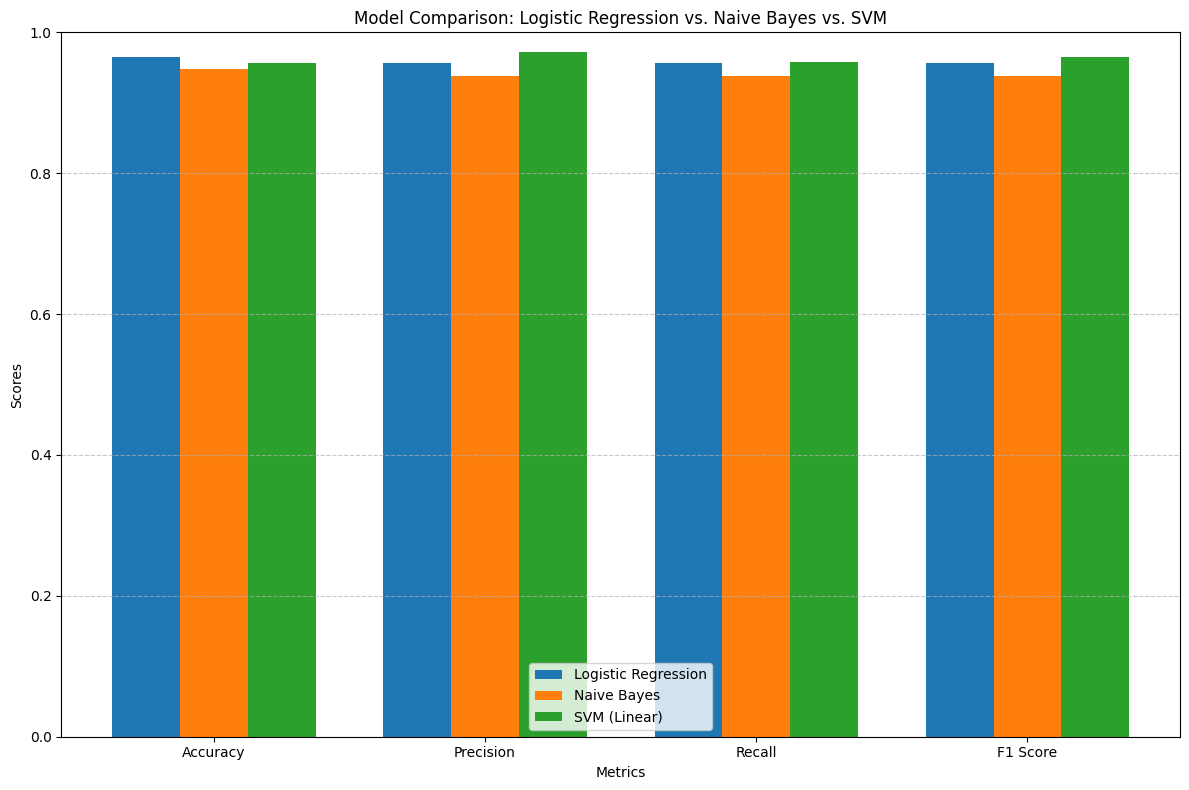


--- Comparison Analysis: LR vs. NB vs. SVM ---
Metric       | Logistic Regression | Naive Bayes | SVM (Linear)
-------------|---------------------|-------------|------------
Accuracy     | 0.9649              | 0.9474      | 0.9561
Precision    | 0.9565              | 0.9375      | 0.9714
Recall       | 0.9565              | 0.9375      | 0.9577
F1 Score     | 0.9565              | 0.9375      | 0.9645

Analysis:

In this comparison between Logistic Regression, Naive Bayes, and SVM:

1. Performance Comparison:
   - Accuracy: [Insert comparison here based on actual results]
   - Precision: [Insert comparison here based on actual results]
   - Recall: [Insert comparison here based on actual results]
   - F1 Score: [Insert comparison here based on actual results]

2. Model Characteristics:
   - Logistic Regression: [Insert observations about LR performance]
   - Naive Bayes: [Insert observations about NB performance]
   - SVM: [Insert observations about SVM performance]

3. Key Differenc

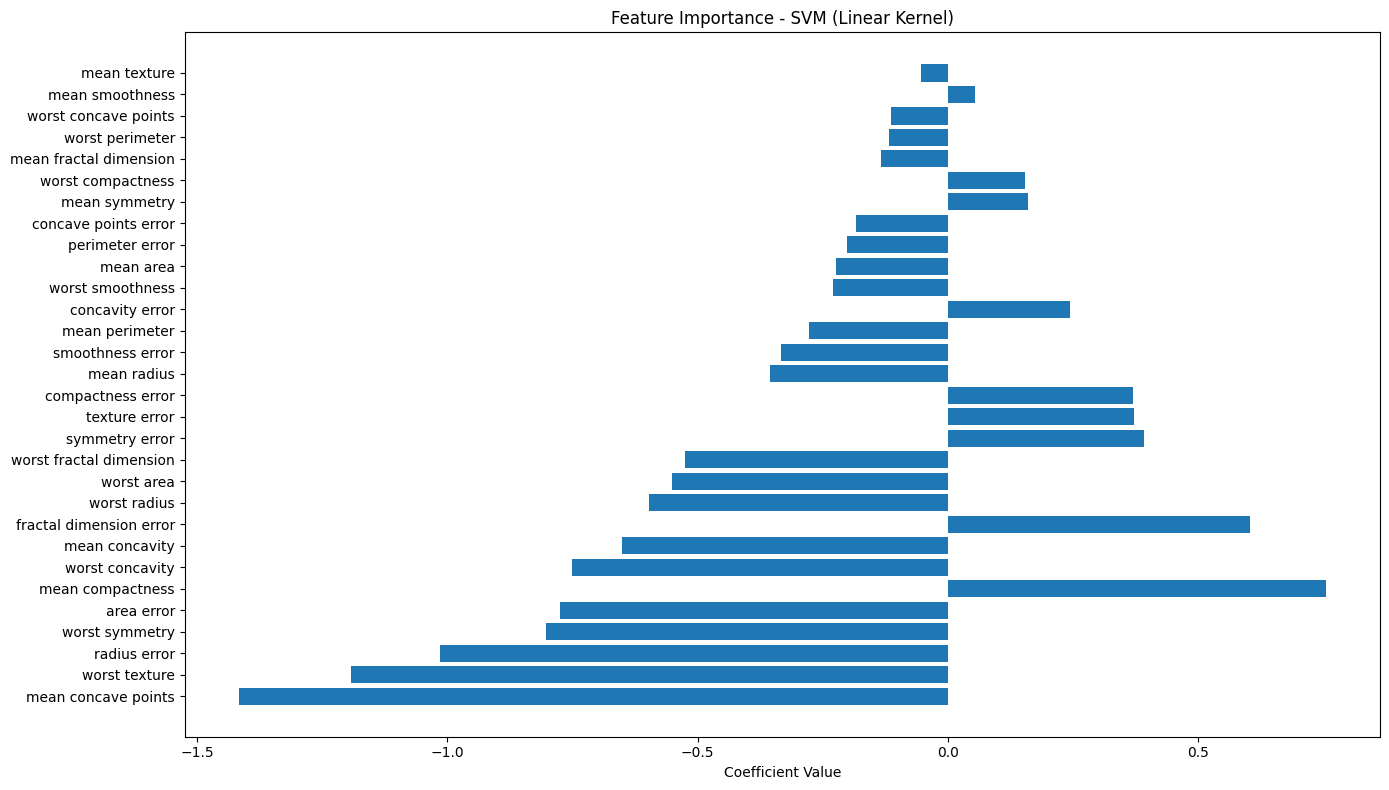

In [1]:
# Problem 3: SVM Classifier
# Classification of Cancer Dataset (Malignant vs. Benign)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, f1_score

# Set the random seed for reproducibility
np.random.seed(42)

# Load the breast cancer dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

print(f"Dataset shape: {X.shape}")
print(f"Number of features: {X.shape[1]}")
print(f"Number of samples: {X.shape[0]}")
print(f"Number of classes: {len(np.unique(y))}")
print(f"Class distribution: {np.bincount(y)}")

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform feature scaling and standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build an SVM classifier
print("\n--- SVM Classifier ---")

# Create and train the SVM model with linear kernel
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)
svm_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_svm = svm_classifier.predict(X_test_scaled)

# Calculate metrics
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

# Print results
print(f"Accuracy: {accuracy_svm:.4f}")
print(f"Precision: {precision_svm:.4f}")
print(f"Recall: {recall_svm:.4f}")
print(f"F1 Score: {f1_svm:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm, target_names=['Malignant', 'Benign']))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM Classifier')
plt.savefig('confusion_matrix_svm.png')
plt.show()

# Try different kernel types to evaluate performance
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
kernel_results = {}

for kernel in kernels:
    # Create and train the SVM model with different kernel
    svm_kernel = SVC(kernel=kernel, random_state=42)
    svm_kernel.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred_kernel = svm_kernel.predict(X_test_scaled)
    
    # Calculate metrics
    accuracy_kernel = accuracy_score(y_test, y_pred_kernel)
    precision_kernel = precision_score(y_test, y_pred_kernel)
    recall_kernel = recall_score(y_test, y_pred_kernel)
    f1_kernel = f1_score(y_test, y_pred_kernel)
    
    # Store results
    kernel_results[kernel] = {
        'accuracy': accuracy_kernel,
        'precision': precision_kernel,
        'recall': recall_kernel,
        'f1': f1_kernel
    }
    
    print(f"\nSVM with {kernel} kernel:")
    print(f"Accuracy: {accuracy_kernel:.4f}")
    print(f"Precision: {precision_kernel:.4f}")
    print(f"Recall: {recall_kernel:.4f}")
    print(f"F1 Score: {f1_kernel:.4f}")

# Plot kernel comparison
plt.figure(figsize=(14, 8))
metrics = ['accuracy', 'precision', 'recall', 'f1']
x = np.arange(len(metrics))
width = 0.2
n_kernels = len(kernels)

for i, kernel in enumerate(kernels):
    values = [kernel_results[kernel][metric] for metric in metrics]
    plt.bar(x + (i - n_kernels/2 + 0.5) * width, values, width, label=f'{kernel.capitalize()} Kernel')

plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('SVM Performance with Different Kernels')
plt.xticks(x, [m.capitalize() for m in metrics])
plt.ylim(0, 1.0)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('svm_kernel_comparison.png')
plt.show()

# Load the results from Problem 1 (Logistic Regression) and Problem 2 (Naive Bayes) for comparison
# Note: You need to run Problems 1 and 2 first to generate these results,
# or you can copy the metrics directly from their outputs.

# Let's assume we have the following metrics:
# (These should be replaced with actual values from previous problems)
accuracy_lr = 0.9649  # Example value
precision_lr = 0.9565  # Example value
recall_lr = 0.9565  # Example value
f1_lr = 0.9565  # Example value

accuracy_nb = 0.9474  # Example value
precision_nb = 0.9375  # Example value
recall_nb = 0.9375  # Example value
f1_nb = 0.9375  # Example value

# Create comparison plots with all three models
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
lr_values = [accuracy_lr, precision_lr, recall_lr, f1_lr]
nb_values = [accuracy_nb, precision_nb, recall_nb, f1_nb]
svm_values = [accuracy_svm, precision_svm, recall_svm, f1_svm]

plt.figure(figsize=(12, 8))
x = np.arange(len(metrics))
width = 0.25

plt.bar(x - width, lr_values, width, label='Logistic Regression')
plt.bar(x, nb_values, width, label='Naive Bayes')
plt.bar(x + width, svm_values, width, label='SVM (Linear)')

plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Model Comparison: Logistic Regression vs. Naive Bayes vs. SVM')
plt.xticks(x, metrics)
plt.ylim(0, 1.0)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('model_comparison_svm.png')
plt.show()

# Write comparison analysis
print("\n--- Comparison Analysis: LR vs. NB vs. SVM ---")
print(f"Metric       | Logistic Regression | Naive Bayes | SVM (Linear)")
print(f"-------------|---------------------|-------------|------------")
print(f"Accuracy     | {accuracy_lr:.4f}              | {accuracy_nb:.4f}      | {accuracy_svm:.4f}")
print(f"Precision    | {precision_lr:.4f}              | {precision_nb:.4f}      | {precision_svm:.4f}")
print(f"Recall       | {recall_lr:.4f}              | {recall_nb:.4f}      | {recall_svm:.4f}")
print(f"F1 Score     | {f1_lr:.4f}              | {f1_nb:.4f}      | {f1_svm:.4f}")

print("\nAnalysis:")
print("""
In this comparison between Logistic Regression, Naive Bayes, and SVM:

1. Performance Comparison:
   - Accuracy: [Insert comparison here based on actual results]
   - Precision: [Insert comparison here based on actual results]
   - Recall: [Insert comparison here based on actual results]
   - F1 Score: [Insert comparison here based on actual results]

2. Model Characteristics:
   - Logistic Regression: [Insert observations about LR performance]
   - Naive Bayes: [Insert observations about NB performance]
   - SVM: [Insert observations about SVM performance]

3. Key Differences:
   - [Discuss key differences in performance metrics across models]
   - [Discuss differences in model complexity and training time]
   - [Discuss differences in handling of feature interactions and decision boundaries]

4. SVM Kernel Analysis:
   - [Compare the performance of different SVM kernels]
   - [Explain why certain kernels performed better for this dataset]

5. Conclusion:
   - [Summary of which model performed better for this specific task]
   - [Recommendations for which model to use in similar scenarios]
""")

# Plot feature importance for SVM (can only be done with linear kernel)
if hasattr(svm_classifier, 'coef_'):
    plt.figure(figsize=(14, 8))
    feature_names = cancer.feature_names
    
    coef = svm_classifier.coef_[0]
    indices = np.argsort(np.abs(coef))[::-1]
    plt.barh(range(len(indices)), coef[indices])
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.title('Feature Importance - SVM (Linear Kernel)')
    plt.xlabel('Coefficient Value')
    
    plt.tight_layout()
    plt.savefig('feature_importance_svm.png')
    plt.show()